# U-Net
## Testing U-Net

In [ ]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

helper_path = os.path.abspath(os.path.join('../helper'))
if helper_path not in sys.path:
    sys.path.append(helper_path)

In [1]:
from helper.models.config import *
from helper.models.unet import *
from helper.data.dataobj import DrainageDataset
from torch.utils.data import DataLoader
from helper.data.dataobj import DrainageDataset
from sklearn.model_selection import train_test_split
from helper.utilities import *
from helper.callbacks.logs import save_history_callback, save_resulting_callback
from helper.callbacks.visualize import draw_history_log, draw_resulting_log
from transformers import logging
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
logging.set_verbosity_error()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


## Loading model

In [2]:
device = 'cuda'
unet_model = UNet()
unet_model.load('../helper/models/saved/UNet-4.pt')

Initialized UNet


In [3]:
config_unet = Config(
    model=unet_model,
    num_epochs=200,
    lr=4 * 1e-4,
    scheduler=True
)
print(config_unet.get_params())

{'num_epochs': 200, 'batch_size': 64, 'opt': 'Adam', 'crit': 'CrossEntropy', 'learning_rate': 0.0004, 'scheduler': 'ReduceLROnPlateau'}


## Dataset

In [4]:
images = np.load('../helper/data/datasets/new_images.npy').astype(np.uint8)
masks = np.load('../helper/data/datasets/new_masks.npy')

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

print('Getting test dataset')
bins = [get_bin(mask) for mask in masks]

train_images, test_images, train_masks, test_masks = train_test_split(images, masks, test_size=test_ratio, stratify=bins, random_state=42)

test_dataset = DrainageDataset(test_images, test_masks, device=device, mode='test')
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

Getting test dataset


## Testing model

In [5]:
details = unet_model.test_epoch(test_dataloader, config_unet.criterion, device='cuda', detailed=True)
save_resulting_callback(unet_model, metrics=details, hyperparams=config_unet.get_params())
print(f'Saved details of testing {unet_model.get_name()}')

Saved details of testing UNet


In [6]:
print(details)

{'loss': 0.027521702470958875, 'acc': 0.9941942095756531, 'prec': 0.8970073461532593, 'recall': 0.7154412269592285, 'f1': 0.7942670583724976, 'dice': 0.8660163283348083, 'iou': 0.6617083549499512}


## Visualizing

### Getting metrics vizualization

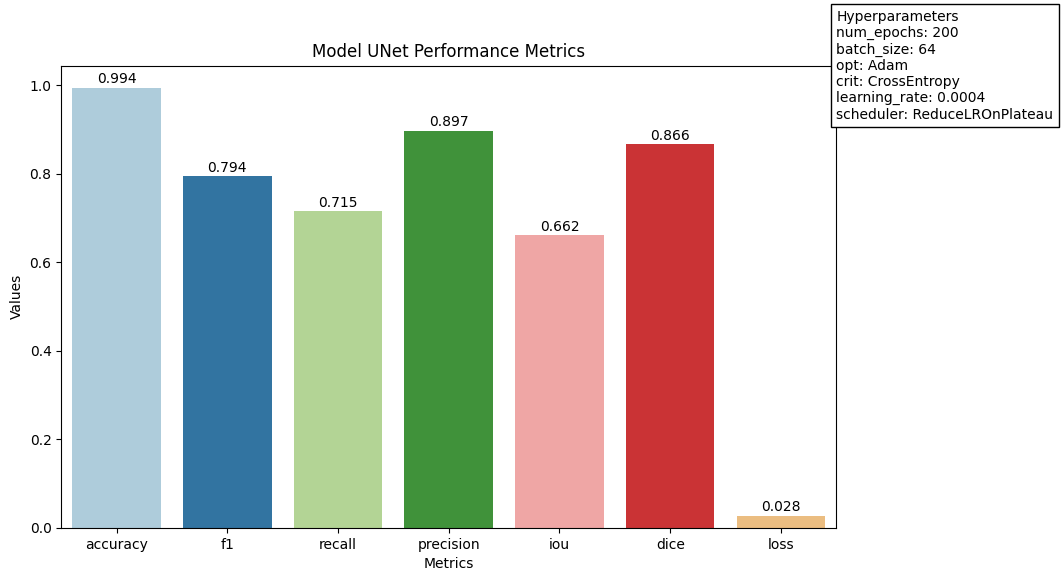

In [7]:
draw_resulting_log('UNet-4.json')

### Model's predicts examples

In [8]:
image, mask = test_dataset[10] # 0 1 10 11 12
unet_model.predict(image, mask, device)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])